<a href="https://colab.research.google.com/github/rimshaharmaen/EDA-Hotel-Booking-Analysis/blob/main/Rimsha_Harmaen_Hotel_Booking.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Have you ever wondered when the best time of year to book a hotel room is? Or the optimal length of stay in order to get the best daily rate? What if you wanted to predict whether or not a hotel was likely to receive a disproportionately high number of special requests? This hotel booking dataset can help you explore those questions!**
# **This data set contains booking information for a city hotel and a resort hotel, and includes information such as when the booking was made, length of stay, the number of adults, children, and/or babies, and the number of available parking spaces, among other things. All personally identifying information has been removed from the data.**

# **Explore and analyze the data to discover important factors that govern the bookings.**


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [105]:
df=pd.read_csv("/content/drive/MyDrive/Almabetter/Hotel Bookings.csv")

In [ ]:
df.shape

(119390, 32)

There are 32 columns in the data 

In [ ]:
df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [ ]:
df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


INFERENCE:
*  we observe that columns like 'children', 'company', 'country' and 'agent' have null values.




**Now lets have a look into the unique values of columns**

In [94]:
df['hotel'].unique()

array(['Resort Hotel', 'City Hotel'], dtype=object)

In [96]:
df['meal'].unique()

array(['BB', 'FB', 'HB', 'SC', 'Undefined'], dtype=object)

In [98]:
df['market_segment'].unique()

array(['Direct', 'Corporate', 'Online TA', 'Offline TA/TO',
       'Complementary', 'Groups', 'Undefined', 'Aviation'], dtype=object)

In [100]:
df['distribution_channel'].unique()

array(['Direct', 'Corporate', 'TA/TO', 'Undefined', 'GDS'], dtype=object)

In [101]:
df['children'].unique()

array([ 0.,  1.,  2., 10.,  3., nan])

In [102]:
df['arrival_date_year'].unique()

array([2015, 2016, 2017])

**Check for Duplicate rows and drop it**

In [106]:
df[df.duplicated()].shape

(31994, 32)

In [103]:
#from above cell we observe that there are 31994 duplicate rows so we will drop these rows 
df.drop_duplicates(inplace = True)
df.shape

(87396, 32)

After droping the duplicate rows we observe that there are 87396 rows 

**Now lets check if there are any missing values**

In [108]:
df.isnull().sum().sort_values(ascending = False)[:5]

company               112593
agent                  16340
country                  488
children                   4
reserved_room_type         0
dtype: int64

**Handle the missing values**

In [ ]:
df[['company']] = df[['company']].fillna(0)

In [110]:
df['country'].fillna('others', inplace = True)

In [114]:
df['children'].fillna(df['children'].mean(), inplace = True)

In [111]:
df[['agent']] = df[['agent']].fillna(0)

# **Which Room type is in Demand??**

In [5]:
df["reserved_room_type"].unique()

array(['C', 'A', 'D', 'E', 'G', 'F', 'H', 'L', 'P', 'B'], dtype=object)

In [6]:
#creating a dataframe which stores the number of time a particular room type is preferred
room_type_demand_df=(df["assigned_room_type"].value_counts()).reset_index()
room_type_demand_df.rename(columns = {'index':'room_type','assigned_room_type':'count'}, inplace = True)
room_type_demand_df

,room_type,count
0,A,74053
1,D,25322
2,E,7806
3,F,3751
4,G,2553
5,C,2375
6,B,2163
7,H,712
8,I,363
9,K,279


Text(0, 0.5, 'Number of Bookings')

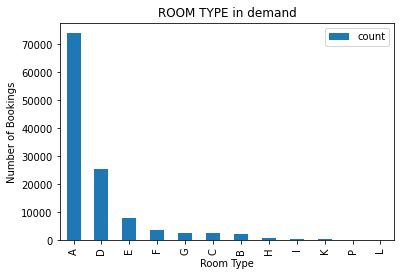

In [123]:
room_type_demand_df.plot(x="room_type",y=["count"],kind="bar")
plt.title("ROOM TYPE in demand")
plt.xlabel("Room Type")
plt.ylabel("Number of Bookings")

**Inference:**
*   we  observe that Room type A is in demand followed by D and L and P are least preferred 
  


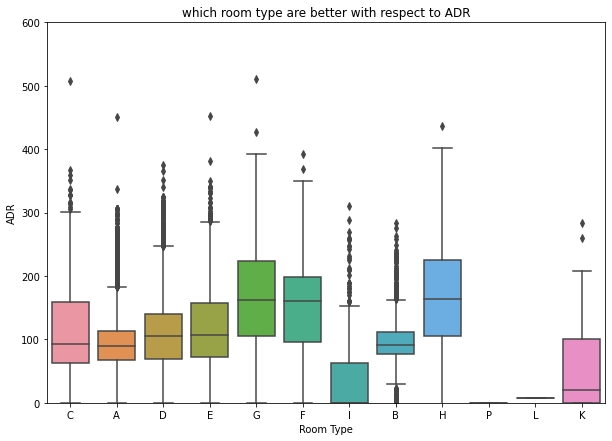

In [124]:
#find which room type are better with respect to ADR
fig = plt.figure(figsize =(10,7))
sns.boxplot( x = df['assigned_room_type'], y = df['adr'])
plt.ylim(0, 600) #To set the range of Y-axis,we use ylim() method.
plt.title("which room type are better with respect to ADR")
plt.xlabel("Room Type")
plt.ylabel("ADR")
plt.show()

**Inference:**
we observe that Room type H,G,C are better with respect to adr

# **Which agent made more booking**

In [119]:
df[['agent']] = df[[ 'agent']].astype('int64')

In [120]:
#creating a dataframe which finds the number of booking by each agent 
agnt_vs_booking_df=df['agent'].value_counts()
agnt_vs_booking_df=agnt_vs_booking_df.reset_index()
agnt_vs_booking_df.rename(columns = {'index':'agent','agent':'Count'}, inplace = True)
agnt_vs_booking_df

,agent,Count
0,9,31961
1,0,16340
2,240,13922
3,1,7191
4,14,3640
...,...,...
329,280,1
330,285,1
331,289,1
332,265,1


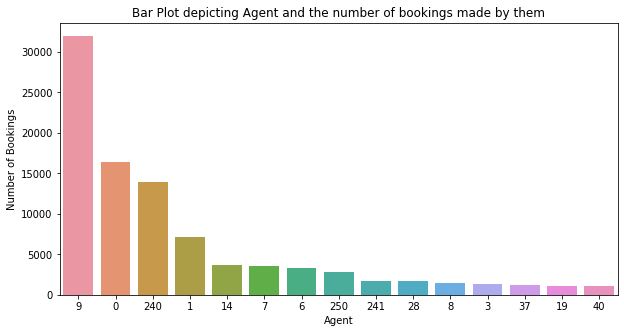

In [127]:
#agnt_vs_booking_df.plot(x="agent",y=["index"],kind="bar")
agnt_vs_booking_df.drop(agnt_vs_booking_df[agnt_vs_booking_df["Count"]==0.0].index,inplace=True)
agnt_vs_booking_df=agnt_vs_booking_df[:15]
plt.figure(figsize = (10,5))
sns.barplot(x = 'agent', y = 'Count',data = agnt_vs_booking_df, order = agnt_vs_booking_df.sort_values('Count', ascending = False).agent)
plt.title("Bar Plot depicting Agent and the number of bookings made by them")
plt.xlabel("Agent")
plt.ylabel("Number of Bookings")
plt.show()

In [135]:
p=(agnt_vs_booking_df["Count"]/df.shape[0])*100
agnt_vs_booking_df["Percentage"]=round(p,2)
agnt_vs_booking_df=agnt_vs_booking_df[:5]

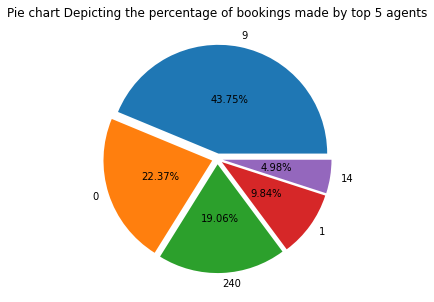

In [139]:
plt.figure(figsize = (10,5))
plt.pie(agnt_vs_booking_df["Percentage"],autopct="%.2f%%", labels = agnt_vs_booking_df["agent"], pctdistance=0.5, explode=[0.05]*5)
plt.title("Pie chart Depicting the percentage of bookings made by top 5 agents")
plt.show()

In [88]:
top_3_agents=agnt_vs_booking_df[:3]
top_3_agents

,agent,Count
0,9,31961
1,0,16340
2,240,13922


In [89]:
agent_vs_month=(df
       .groupby(["agent", "arrival_date_month"])
       .size()
       .reset_index()
       .pivot(columns="agent", index="arrival_date_month")
       )
agent_vs_month.replace(np.NaN,0,inplace=True)
agent_vs_month

0                                                 \
agent                  0       1     2      3     4     5      6      7     
arrival_date_month                                                          
April               1331.0   339.0  45.0  139.0   0.0  12.0  108.0  314.0   
August              1195.0  1352.0  11.0   15.0   0.0  60.0  482.0  292.0   
December            1149.0   257.0   1.0  120.0   0.0  29.0  125.0  156.0   
February            1607.0   142.0   9.0   71.0   0.0  12.0   75.0  269.0   
January             1366.0   101.0   4.0   17.0   0.0   9.0   62.0  189.0   
July                1057.0  1185.0  19.0   14.0   0.0  63.0  559.0  301.0   
June                1133.0   342.0   9.0  159.0   0.0  47.0  430.0  338.0   
March               1645.0   315.0   8.0   39.0   0.0   5.0  102.0  395.0   
May                 1702.0   383.0   2.0  229.0   0.0   9.0  193.0  406.0   
November            1385.0   235.0   4.0    3.0   0.0   1.0  117.0  233.0   
October             1699.0   914.0  30.0  304.0  12.0  10.0  513.0  355.0   
September           1071.0  1626.0  20.0  226.0  35.0  73.0  524.0  291.0   

                                   ...                                        \
agent                 8       9    ...   495  497   502  508   509  510  526   
arrival_date_month                 ...                                         
April               140.0  3518.0  ...   0.0  0.0  24.0  0.0   0.0  0.0  3.0   
August              145.0  4299.0  ...   0.0  0.0   0.0  5.0  10.0  0.0  2.0   
December            103.0  1726.0  ...   0.0  0.0   0.0  0.0   0.0  0.0  0.0   
February             67.0  2086.0  ...   0.0  0.0   0.0  0.0   0.0  0.0  0.0   
January              53.0  1521.0  ...   0.0  0.0   0.0  0.0   0.0  2.0  0.0   
July                192.0  3875.0  ...   0.0  0.0   0.0  0.0   0.0  0.0  3.0   
June                141.0  3030.0  ...   7.0  1.0   0.0  0.0   0.0  0.0  1.0   
March               161.0  2846.0  ...  50.0  0.0   0.0  0.0   0.0  0.0  0.0   
May                 166.0  3393.0  ...   0.0  0.0   0.0  1.0   0.0  0.0  1.0   
November             97.0  1448.0  ...   0.0  0.0   0.0  0.0   0.0  0.0  0.0   
October             134.0  2215.0  ...   0.0  0.0   0.0  0.0   0.0  0.0  0.0   
September           115.0  2004.0  ...   0.0  0.0   0.0  0.0   0.0  0.0  0.0   

                                     
agent                527   531  535  
arrival_date_month                   
April               35.0   0.0  0.0  
August               0.0   1.0  0.0  
December             0.0   0.0  0.0  
February             0.0   0.0  0.0  
January              0.0   0.0  0.0  
July                 0.0  32.0  0.0  
June                 0.0  35.0  3.0  
March                0.0   0.0  0.0  
May                  0.0   0.0  0.0  
November             0.0   0.0  0.0  
October              0.0   0.0  0.0  
September            0.0   0.0  0.0  

[12 rows x 334 columns]

In [90]:
res_df=pd.crosstab(df.arrival_date_month,df.agent)
res_df

agent,0,1,2,3,4,5,6,7,8,9,...,495,497,502,508,509,510,526,527,531,535
arrival_date_month,,,,,,,,,,,,,,,,,,,,,
April,1331,339,45,139,0,12,108,314,140,3518,...,0,0,24,0,0,0,3,35,0,0
August,1195,1352,11,15,0,60,482,292,145,4299,...,0,0,0,5,10,0,2,0,1,0
December,1149,257,1,120,0,29,125,156,103,1726,...,0,0,0,0,0,0,0,0,0,0
February,1607,142,9,71,0,12,75,269,67,2086,...,0,0,0,0,0,0,0,0,0,0
January,1366,101,4,17,0,9,62,189,53,1521,...,0,0,0,0,0,2,0,0,0,0
July,1057,1185,19,14,0,63,559,301,192,3875,...,0,0,0,0,0,0,3,0,32,0
June,1133,342,9,159,0,47,430,338,141,3030,...,7,1,0,0,0,0,1,0,35,3
March,1645,315,8,39,0,5,102,395,161,2846,...,50,0,0,0,0,0,0,0,0,0
May,1702,383,2,229,0,9,193,406,166,3393,...,0,0,0,1,0,0,1,0,0,0


In [ ]:
df["agent"].isin(top_3_agents.agent)
top_3_agents_list=list(top_3_agents.agent)
columnslist=list(res_df)
columnslist

In [92]:
for x in columnslist:
  if x not  in top_3_agents_list:
    res_df=res_df.drop([x],axis=1)

<Figure size 5760x2160 with 0 Axes>

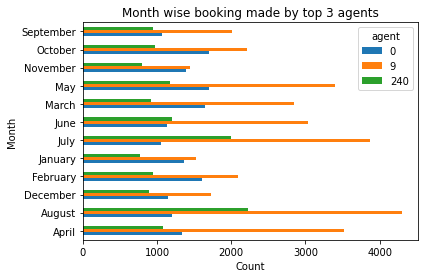

In [142]:
plt.figure(figsize = (80,30))
res_df.plot(kind="barh")
plt.title("Month wise booking made by top 3 agents")
plt.ylabel("Month")
plt.xlabel("Count")
plt.show()#month wise booking of top 3 agents

INFERENCE:


*   
Agent 9 made more bookings in the month of August followed by JUly
*  Agent 1 made more bookings in September month

*   
Agent 240 made more booking in August

*   We also observe that  the months August and July are most preferred 




# **Which Distribution channel is used most**

In [53]:
channel_vs_count_df=(df["distribution_channel"].value_counts()).reset_index().rename(columns={"index":"Channel","distribution_channel":"Count"})
channel_vs_count_df

,Channel,Count
0,TA/TO,97870
1,Direct,14645
2,Corporate,6677
3,GDS,193
4,Undefined,5


In [144]:
#finding the percentage 
p=(channel_vs_count_df["Count"]/df.shape[0])*100
channel_vs_count_df["Percentage"]=round(p,2)

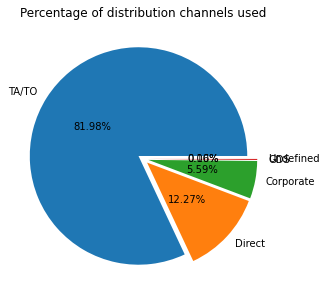

In [145]:
plt.figure(figsize = (10,5))
plt.pie(channel_vs_count_df["Percentage"],autopct="%.2f%%", labels = channel_vs_count_df["Channel"], pctdistance=0.5, explode=[0.05]*5)
plt.title("Percentage of distribution channels used")
plt.show()

INFERENCE:

*   TA/TO is most preferred distribution channer




ADR and Distribution channel 

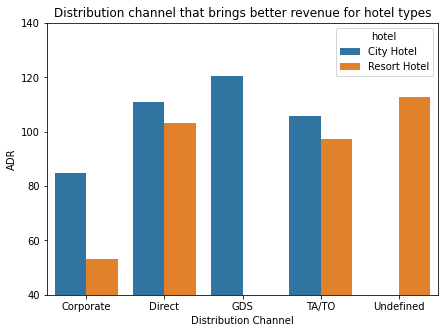

In [146]:
dc_vs_hotel = df.groupby(['distribution_channel', 'hotel'])
dch_df = pd.DataFrame(round((dc_vs_hotel['adr']).agg(np.mean),2))
dch_df=dch_df.reset_index().rename(columns = {'adr': 'average_adr'})
plt.figure(figsize = (7,5))
sns.barplot(x = dch_df['distribution_channel'], y = dch_df['average_adr'], hue = dch_df['hotel'])
plt.title("Distribution channel that brings better revenue for hotel types")
plt.ylabel("ADR")
plt.xlabel("Distribution Channel")
plt.ylim(40,140)
plt.show()

INFERENCE:

*   For City Hotel GDS generates more revenue 





# **people from which country are visiting more often**

top 3 country
in which month they are visitn often
which channel do they prefer
do they cancel the booking
which hotel type do they prefer

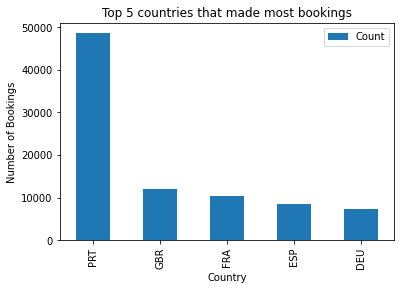

In [149]:
num_visits_per_country=df["country"].value_counts().reset_index()
num_visits_per_country=num_visits_per_country[:5]
num_visits_per_country.rename(columns={"index":"country","country":"Count"},inplace=True)
#print(num_visits_per_country)
num_visits_per_country.plot(kind="bar",x="country")
plt.title("Top 5 countries that made most bookings")
plt.ylabel("Number of Bookings")
plt.xlabel("Country")
plt.show()

INFERENCE:

*   Portugal is the country with most visits


